# Importing Libraries and installing opencv

pip install opencv-python 

In [ ]:
##### Standard Libraries #####
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set_context("poster")

%matplotlib inline


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import tensorflow as tf
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.layers import MaxPooling2D, Conv2D, Flatten, Dense, ZeroPadding2D

In [ ]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
import os

import sklearn.metrics

# Loding the images from the folder

In [ ]:
import cv2
import os

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

In [ ]:
import cv2
import glob

imdir = "https://drive.google.com/file/d/1HEHo60NWlAJ0Sp3IhzwqZyXakcNhjkRZ/view?usp=sharing"
ext = ['jpeg', 'jpg', 'png']    # Add image formats here

files = []
[files.extend(glob.glob(imdir + '*.' + e)) for e in ext]

images = [cv2.imread(file) for file in files]

In [ ]:
len(images)

151

In [ ]:
norm_images = [cv2.imread(file) for file in glob.glob('https://drive.google.com/file/d/1pUMeYi-0038Wodq2qh7k3D5QNiDQHabQ/view?usp=sharing.jpeg')]

In [ ]:
norm=pd.DataFrame(norm_images,columns=["Images"])

D:\Anaconda\lib\site-packages\pandas\core\internals\construction.py:540: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array([convert(v) for v in values])


In [ ]:
norm

,Images
0,"[[[72, 72, 72], [68, 68, 68], [67, 67, 67], [7..."
1,"[[[0, 0, 0], [46, 46, 46], [43, 43, 43], [42, ..."
2,"[[[80, 80, 80], [79, 79, 79], [77, 77, 77], [7..."
3,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
4,"[[[78, 78, 78], [79, 79, 79], [77, 77, 77], [7..."
...,...
146,"[[[5, 5, 5], [2, 2, 2], [1, 1, 1], [4, 4, 4], ..."
147,"[[[6, 6, 6], [6, 6, 6], [6, 6, 6], [6, 6, 6], ..."
148,"[[[77, 77, 77], [81, 81, 81], [85, 85, 85], [8..."
149,"[[[43, 43, 43], [45, 45, 45], [46, 46, 46], [4..."


norm

In [ ]:
cov=pd.DataFrame(images,columns=["Images"])

D:\Anaconda\lib\site-packages\pandas\core\internals\construction.py:540: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array([convert(v) for v in values])


In [ ]:
cov

,Images
0,"[[[182, 182, 182], [169, 169, 169], [152, 152,..."
1,"[[[255, 255, 255], [255, 255, 255], [126, 126,..."
2,"[[[253, 253, 253], [109, 109, 109], [107, 107,..."
3,"[[[39, 39, 39], [47, 47, 47], [49, 49, 49], [4..."
4,"[[[178, 178, 178], [178, 178, 178], [178, 178,..."
...,...
146,"[[[67, 67, 67], [72, 72, 72], [77, 77, 77], [7..."
147,"[[[3, 3, 3], [3, 3, 3], [3, 3, 3], [3, 3, 3], ..."
148,"[[[1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], ..."
149,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."


# Checking and plot any one image 

In [ ]:
img1=images[0][0][0]
img1

array([182, 182, 182], dtype=uint8)

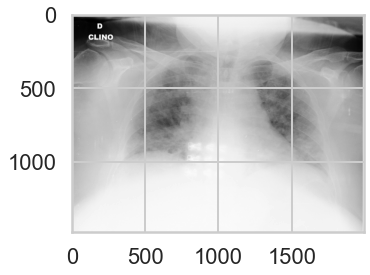

In [ ]:
im = cv2.imread("https://drive.google.com/file/d/1pUMeYi-0038Wodq2qh7k3D5QNiDQHabQ/view?usp=sharing.jpeg", 0) / 255

plt.imshow(im, cmap='gray', vmin=0, vmax=1) 
plt.show()

# Keras split train test set using Imagedatagenerator

In [ ]:
from keras.preprocessing import image

train_gen = image.ImageDataGenerator(rescale=1/255,horizontal_flip=True,zoom_range=0.2)

val_gen = image.ImageDataGenerator(rescale = 1/255)



In [ ]:
DIR = 'C:/Users/Corono Lung Dataset--CNN/Data/'  #'/kaggle/input/covidct/'
SUBDIR_POS = 'covid/'
SUBDIR_NEG = 'normal/'
print(f'Positive samples: {len(os.listdir(DIR + SUBDIR_POS))}.')
print(f'Negative samples: {len(os.listdir(DIR + SUBDIR_NEG))}.')

Positive samples: 151.
Negative samples: 151.


In [ ]:
EPOCHS = 40
BATCH_SIZE = 64
OPTIMIZER = tf.keras.optimizers.Adam(learning_rate=0.001, decay=0.001 / EPOCHS)
img_height, img_width = 248, 248
es = EarlyStopping(monitor='val_acc', mode='max',
                   verbose=1, 
                   patience=10, restore_best_weights=True)

In [ ]:
# https://stackoverflow.com/questions/42443936/keras-split-train-test-set-when-using-imagedatagenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=5,
    width_shift_range=0.05,
    height_shift_range=0.05,
    shear_range=0.05,
    zoom_range=0.05,
    validation_split=0.2) 

train_generator = train_datagen.flow_from_directory(
    DIR,
    target_size=(img_height, img_width),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    color_mode="grayscale",
    subset='training') 

validation_generator = train_datagen.flow_from_directory(
    DIR, 
    target_size=(img_height, img_width),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    color_mode="grayscale",
    subset='validation')

Found 242 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [ ]:
train_generator

In [ ]:
validation_generator

# Function Definition to build CNN Model 

In [ ]:
def create_model():
    model = Sequential([
        Conv2D(16, 1, padding='same', activation='relu', input_shape=(img_height, img_width, 1)),
        MaxPooling2D(),
        Conv2D(32, 3, padding='same', activation='relu'),
        MaxPooling2D(),
        Conv2D(64, 5, padding='same', activation='relu'),
        MaxPooling2D(),
        Conv2D(64, 5, padding='same', activation='relu'),
        MaxPooling2D(),
        
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.4),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(8, activation='relu'),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer=OPTIMIZER,
                  loss='binary_crossentropy',
                  metrics=['accuracy', 'Precision', 'Recall'])
    
    return model

Model Building

In [ ]:
model = create_model()
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 248, 248, 16)      32        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 124, 124, 16)     0         
 )                                                               
                                                                 
 conv2d_9 (Conv2D)           (None, 124, 124, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 62, 62, 64)        51264     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 31, 31, 64)      

In [ ]:
hist = model.fit_generator(
        train_generator,
        steps_per_epoch = train_generator.samples // BATCH_SIZE,
        validation_data = validation_generator, 
        validation_steps = validation_generator.samples // BATCH_SIZE,
        epochs = EPOCHS,
        verbose = 0, 
        callbacks=[es])

C:\Users\santh\AppData\Local\Temp/ipykernel_22392/543211983.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(


KeyboardInterrupt: 

In [ ]:
hist=model.fit(train_generator, validation_data=validation_generator, epochs=EPOCHS)

Epoch 1/40
4/4 [==============================] - 17s 5s/step - loss: 0.0159 - accuracy: 0.9917 - precision: 1.0000 - recall: 0.9835 - val_loss: 0.0211 - val_accuracy: 0.9833 - val_precision: 0.9677 - val_recall: 1.0000
Epoch 2/40
4/4 [==============================] - 13s 3s/step - loss: 0.0209 - accuracy: 0.9917 - precision: 1.0000 - recall: 0.9835 - val_loss: 5.1781e-04 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 3/40
4/4 [==============================] - 15s 4s/step - loss: 0.0112 - accuracy: 0.9959 - precision: 1.0000 - recall: 0.9917 - val_loss: 0.0090 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 4/40
4/4 [==============================] - 14s 4s/step - loss: 0.0152 - accuracy: 0.9876 - precision: 1.0000 - recall: 0.9752 - val_loss: 1.8450e-05 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 5/40
4/4 [==============================] - 15s 4s/step - loss: 0.0189 - accuracy: 0.9876 - precision: 0.9

Epoch 38/40
4/4 [==============================] - 15s 4s/step - loss: 0.0053 - accuracy: 0.9959 - precision: 1.0000 - recall: 0.9917 - val_loss: 3.3946e-04 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 39/40
4/4 [==============================] - 15s 4s/step - loss: 0.0036 - accuracy: 0.9959 - precision: 1.0000 - recall: 0.9917 - val_loss: 1.2491e-06 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 40/40
4/4 [==============================] - 15s 4s/step - loss: 0.0071 - accuracy: 0.9959 - precision: 0.9918 - recall: 1.0000 - val_loss: 0.1049 - val_accuracy: 0.9833 - val_precision: 0.9677 - val_recall: 1.0000


# Plot the loss and accuracy graphs

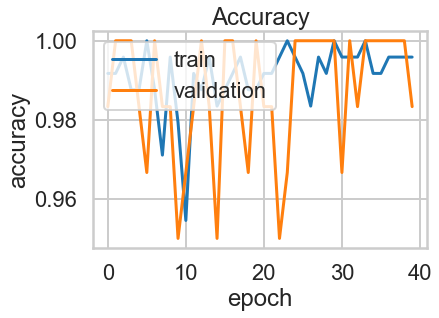

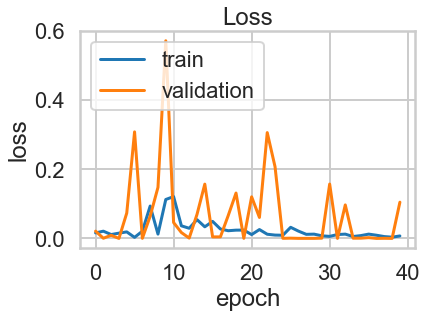

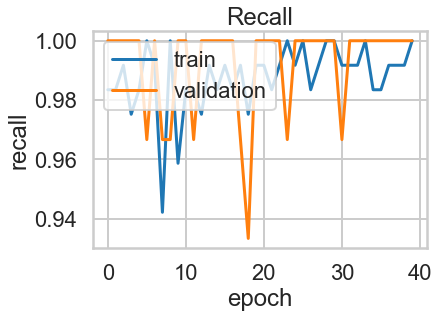

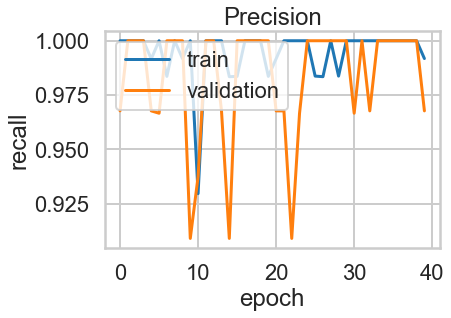

In [ ]:
plt.title('Accuracy')
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.title('Loss')
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.title('Recall')
plt.plot(hist.history['recall'])
plt.plot(hist.history['val_recall'])
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.title('Precision')
plt.plot(hist.history['precision'])
plt.plot(hist.history['val_precision'])
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Testing the model with test data

In [ ]:
y_pred = (model.predict_generator(validation_generator) > 0.5).astype(int)
y_true = validation_generator.classes

for name, value in zip(model.metrics_names, model.evaluate_generator(validation_generator)):
    print(f'{name}: {value}')
    
print(f'F1 score: {sklearn.metrics.f1_score(y_true, y_pred)}')

C:\Users\santh\AppData\Local\Temp/ipykernel_22392/4182330657.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred = (model.predict_generator(validation_generator) > 0.5).astype(int)
C:\Users\santh\AppData\Local\Temp/ipykernel_22392/4182330657.py:4: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  for name, value in zip(model.metrics_names, model.evaluate_generator(validation_generator)):


loss: 2.003105873882305e-05
accuracy: 1.0
precision: 1.0
recall: 1.0
F1 score: 0.5333333333333333


In [ ]:
pd.DataFrame(sklearn.metrics.confusion_matrix(y_true, y_pred), 
             columns=['pred no covid', 'pred covid'], 
             index=['true no covid', 'true covid'])

,pred no covid,pred covid
true no covid,16,14
true covid,14,16


# Save the weight file

In [ ]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("model.h5")